we used mtcnn for face detection.<br>
VGGFace2 for feature extraction.<br>
for person classification<br>
1)cosine similarity<br>
2)KNN

In [2]:
!pip install imutils

In [1]:
import cv2
import tensorflow as tf
from imutils import paths
from matplotlib import pyplot as plt
import random
import re
import pickle
import os
from mtcnn.mtcnn import MTCNN
from numpy import asarray
from PIL import Image
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from scipy.spatial.distance import cosine

In [4]:
def extract_face_from_image(image_path, required_size=(224, 224)):
  # load image and detect faces
    image = plt.imread(image_path)
    detector = MTCNN()
    faces = detector.detect_faces(image)

    face_images = []

    for face in faces:
        # extract the bounding box from the requested face
        x1, y1, width, height = face['box']
        x2, y2 = x1 + width, y1 + height

        # extract the face
        face_boundary = image[y1:y2, x1:x2]

        # resize pixels to the model size
        face_image = Image.fromarray(face_boundary)
        face_image = face_image.resize(required_size)
        face_array = asarray(face_image)
        face_images.append(face_array)

    return face_images

In [5]:
def get_model_scores(faces):
    samples = asarray(faces, 'float32')
    samples = np.array(samples)
    samples=samples.squeeze()
    # prepare the data for the model
    samples = preprocess_input(samples, version=2)

    # create a vggface model object
    model = VGGFace(model='resnet50',
      include_top=False,
      input_shape=(224, 224, 3),
      pooling='avg')

    # perform prediction
    return model(samples)

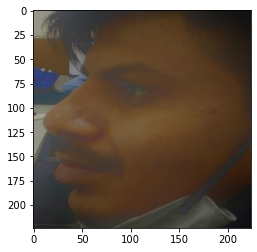

In [54]:
extracted_face = extract_face_from_image('16_09.jpeg')

#Display the first face from the extracted faces
plt.imshow(extracted_face[0])
plt.show()

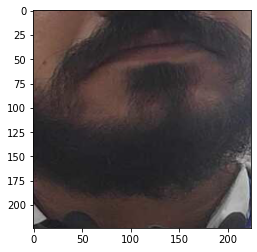

In [156]:
extracted_face = extract_face_from_image('test_images_common\\image_50.jpg')

#Display the first face from the extracted faces
plt.imshow(extracted_face[1])
plt.show()

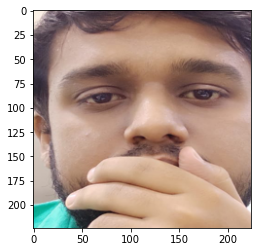

In [8]:
extracted_face = extract_face_from_image('16_11.jpeg')

#Display the first face from the extracted faces
plt.imshow(extracted_face[0])
plt.show()

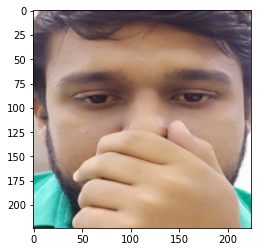

In [9]:
extracted_face = extract_face_from_image('16_12.jpeg')

#Display the first face from the extracted faces
plt.imshow(extracted_face[0])
plt.show()

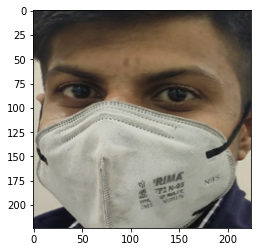

In [10]:
extracted_face = extract_face_from_image('16_13.jpeg')

#Display the first face from the extracted faces
plt.imshow(extracted_face[0])
plt.show()

In [51]:
extracted_face = extract_face_from_image('empty.jpg')
if  np.size(extracted_face)!=0:
    #Display the first face from the extracted faces
    plt.imshow(extracted_face)
    plt.show()

In [50]:
np.size(extracted_face)

0

In [11]:
np.shape(extracted_face)

(1, 224, 224, 3)

In [8]:
imagePaths = list(paths.list_images('image_dataset'))

In [9]:
for i in imagePaths:
    print(i)

image_dataset\archit\opencv_frame_1.jpg
image_dataset\archit\opencv_frame_2.jpg
image_dataset\archit\opencv_frame_3.jpg
image_dataset\archit\opencv_frame_4.jpg
image_dataset\archit\opencv_frame_5.jpg
image_dataset\archit\opencv_frame_6.jpg
image_dataset\divayanshu\image_0.jpg
image_dataset\divayanshu\photo_3.jpg
image_dataset\navneet\1.jpeg
image_dataset\navneet\2.jpeg
image_dataset\navneet\3.jpeg
image_dataset\navneet\4.jpeg
image_dataset\navneet\5.jpeg
image_dataset\navneet\6.jpeg


In [10]:
imagePaths[21]


IndexError: list index out of range

In [37]:
faces = [extract_face_from_image(image_path)
         for image_path in imagePaths]

In [38]:
faces

[[array([[[ 32,  32,  32],
          [ 29,  29,  29],
          [ 28,  28,  28],
          ...,
          [200, 191, 186],
          [200, 191, 186],
          [200, 191, 186]],
  
         [[ 33,  33,  33],
          [ 21,  21,  21],
          [ 14,  14,  14],
          ...,
          [200, 191, 186],
          [200, 191, 186],
          [200, 191, 186]],
  
         [[ 26,  26,  26],
          [ 25,  25,  25],
          [ 28,  28,  28],
          ...,
          [200, 191, 186],
          [200, 191, 186],
          [200, 191, 186]],
  
         ...,
  
         [[208, 198, 197],
          [207, 197, 196],
          [204, 194, 193],
          ...,
          [  3,   3,   4],
          [  8,   8,  10],
          [  7,   6,  12]],
  
         [[208, 198, 197],
          [207, 197, 196],
          [204, 194, 193],
          ...,
          [  3,   3,   4],
          [  7,   7,  10],
          [  9,   8,  14]],
  
         [[208, 198, 197],
          [207, 197, 196],
          [204, 194, 193

In [51]:
np.shape(faces)

(42, 1, 224, 224, 3)

In [40]:
for i in faces:
    print(np.shape(i))

(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)


In [55]:
model_scores = get_model_scores(faces)

In [56]:
model_scores

<tf.Tensor: shape=(42, 2048), dtype=float32, numpy=
array([[0.0000000e+00, 4.0722494e+00, 1.8815443e-01, ..., 1.4792593e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 2.4249964e+00, 2.0735122e-01, ..., 2.0060418e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.3977816e-03, 2.9801433e+00, 2.3178743e-01, ..., 1.2829052e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [7.3319459e+00, 1.0658642e+00, 0.0000000e+00, ..., 7.5559694e-01,
        1.3588525e-02, 6.3880005e+00],
       [3.4013638e+00, 1.4701334e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.8825968e-01, 6.0273118e+00],
       [0.0000000e+00, 0.0000000e+00, 9.5242023e-01, ..., 6.3157449e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)>

In [57]:
#for single image
for i in range(1,42):
    print(cosine(model_scores[0], model_scores[i]))

0.012465178966522217
0.012121319770812988
0.013280391693115234
0.013119697570800781
0.019051671028137207
0.45127642154693604
0.6845337450504303
0.6953733563423157
0.6698060929775238
0.6772456169128418
0.6760315895080566
0.7052049040794373
0.6469891369342804
0.6333489716053009
0.7006362676620483
0.7321417927742004
0.6820463240146637
0.6339862942695618
0.6996636390686035
0.5076112151145935
0.6853997707366943
0.6590980291366577
0.7426959276199341
0.7026851177215576
0.7037550806999207
0.6777614951133728
0.4565880298614502
0.7003664374351501
0.6688910126686096
0.5992216467857361
0.6591220200061798
0.7109003663063049
0.6543702781200409
0.695266991853714
0.5981367528438568
0.678429365158081
0.7233027219772339
0.7186499238014221
0.6848575472831726
0.676700234413147
0.5785176753997803


### knn classifier
for more persons

In [11]:
imagePaths = list(paths.list_images('image_dataset'))

In [12]:
faces = [extract_face_from_image(image_path)
         for image_path in imagePaths]

In [13]:
model_scores = get_model_scores(faces)

In [14]:
type(model_scores)

tensorflow.python.framework.ops.EagerTensor

In [15]:
# converting into ndarray
model_score_arr=model_scores.numpy()

In [16]:
labels=[]
for imagePath in imagePaths:
        label = imagePath.split(os.path.sep)[-2]
        labels.append(label)

In [17]:
labels

['archit',
 'archit',
 'archit',
 'archit',
 'archit',
 'archit',
 'divayanshu',
 'divayanshu',
 'navneet',
 'navneet',
 'navneet',
 'navneet',
 'navneet',
 'navneet']

In [62]:
#(trainRI, testRI, trainRL, testRL) = train_test_split(
 #                       model_score_arr, labels, test_size=20, random_state=42)

In [18]:
model = KNeighborsClassifier(n_neighbors=1,
    n_jobs=-1)
model.fit(model_scores, labels)
#acc = model.score(testRI, testRL)
#print("[INFO] detection accuracy: {:.2f}%".format(acc * 100))

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [132]:
#pass new image here
#model.predict()

predict

In [19]:
faces_test = [extract_face_from_image(image_path)
         for image_path in ['test_01.jpg','test_02.jpg','test_03.jpeg','16_01.jpeg','16_02.jpeg','16_03.jpeg','16_04.jpeg','16_05.jpeg','16_06.jpeg','16_07.jpeg','16_08.jpeg','16_09.jpeg','16_10.jpeg','16_11.jpeg','16_12.jpeg','16_13.jpeg','16_14.jpg','16_15.jpg','16_16.jpg','16_17.jpg','16_18.jpg','16_19.jpg','16_20.jpg','16_21.jpg','16_22.jpeg','16_23.jpeg','16_24.jpeg','16_25.jpeg','16_26.jpeg']]

In [20]:
names_2=['test_01.jpg','test_02.jpg','test_03.jpeg','16_01.jpeg','16_02.jpeg','16_03.jpeg','16_04.jpeg','16_05.jpeg','16_06.jpeg','16_07.jpeg','16_08.jpeg','16_09.jpeg','16_10.jpeg','16_11.jpeg','16_12.jpeg','16_13.jpeg','16_14.jpg','16_15.jpg','16_16.jpg','16_17.jpg','16_18.jpg','16_19.jpg','16_20.jpg','16_21.jpg','16_22.jpeg','16_23.jpeg','16_24.jpeg','16_25.jpeg','16_26.jpeg']

In [21]:
np.shape(faces_test)

(29, 1, 224, 224, 3)

In [22]:
model_scores_test = get_model_scores(faces_test)

In [23]:
model_scores_test_1=model_scores_test.numpy()

In [24]:
model_scores_test_1

array([[1.39077115e+00, 2.34314933e-01, 8.50005722e+00, ...,
        1.48814470e-01, 1.08963135e-03, 1.33232772e-01],
       [3.73144746e-01, 3.80525279e+00, 3.88025784e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.16523355e-02, 1.98886776e+00, 7.76883602e-01, ...,
        7.40650594e-01, 1.58794411e-02, 1.51512669e-02],
       ...,
       [1.39336228e-01, 2.95303077e-01, 4.13356161e+00, ...,
        0.00000000e+00, 3.60393785e-02, 3.04512024e-01],
       [2.40540075e+00, 3.91095400e+00, 4.06705904e+00, ...,
        0.00000000e+00, 1.38371199e-01, 1.05509198e+00],
       [0.00000000e+00, 3.73293042e-01, 5.18622112e+00, ...,
        0.00000000e+00, 1.28553957e-01, 0.00000000e+00]], dtype=float32)

In [25]:
flag2=0

In [26]:
for i in model_scores_test_1:
    as2=model.predict(i.reshape(1,2048))
    print(names_2[flag2]+" "+as2[0]) #predict_proba for probability
    flag2+=1 #predict_proba for probability

test_01.jpg divayanshu
test_02.jpg navneet
test_03.jpeg archit
16_01.jpeg divayanshu
16_02.jpeg navneet
16_03.jpeg navneet
16_04.jpeg navneet
16_05.jpeg archit
16_06.jpeg divayanshu
16_07.jpeg navneet
16_08.jpeg navneet
16_09.jpeg archit
16_10.jpeg navneet
16_11.jpeg navneet
16_12.jpeg navneet
16_13.jpeg archit
16_14.jpg divayanshu
16_15.jpg divayanshu
16_16.jpg divayanshu
16_17.jpg divayanshu
16_18.jpg divayanshu
16_19.jpg divayanshu
16_20.jpg divayanshu
16_21.jpg divayanshu
16_22.jpeg navneet
16_23.jpeg navneet
16_24.jpeg navneet
16_25.jpeg navneet
16_26.jpeg navneet


so accuracy if we include masked unknown person is 94%
16_15-archit and 16_16-navneet are wrong

In [88]:
for i in model_scores_test_1:
    print(model.predict_proba(i.reshape(1,2048))) #predict_proba for probability

[[0. 0. 1.]]
[[0. 1. 0.]]
[[1. 0. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[1. 0. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[1. 0. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[1. 0. 0.]]
[[0. 0. 1.]]
[[1. 0. 0.]]
[[0. 1. 0.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]


In [30]:
faces_test_1 = [extract_face_from_image(image_path)
         for image_path in ['test_01.jpg','test_02.jpg','test_03.jpeg','16_01.jpeg','16_02.jpeg','16_03.jpeg','16_04.jpeg','16_05.jpeg','16_06.jpeg','16_07.jpeg','16_08.jpeg','16_09.jpeg','16_10.jpeg','16_11.jpeg','16_12.jpeg','16_13.jpeg','16_18.jpg','16_19.jpg','16_20.jpg','16_21.jpg','16_22.jpeg','16_23.jpeg','16_24.jpeg','16_25.jpeg','16_26.jpeg']]

In [31]:
np.shape(faces_test_1)

(25, 1, 224, 224, 3)

In [32]:
model_scores_test_unmasked = get_model_scores(faces_test_1)

In [33]:
model_scores_test_temp=model_scores_test_unmasked.numpy()

In [66]:
names=['test_01.jpg','test_02.jpg','test_03.jpeg','16_01.jpeg','16_02.jpeg','16_03.jpeg','16_04.jpeg','16_05.jpeg','16_06.jpeg','16_07.jpeg','16_08.jpeg','16_09.jpeg','16_10.jpeg','16_11.jpeg','16_12.jpeg','16_13.jpeg','16_18.jpg','16_19.jpg','16_20.jpg','16_21.jpg','16_22.jpeg','16_23.jpeg','16_24.jpeg','16_25.jpeg','16_26.jpeg']

In [73]:
flag=0

In [75]:
for i in model_scores_test_temp:
    as1=model.predict(i.reshape(1,2048))
    print(names[flag]+" "+as1[0]) #predict_proba for probability
    flag+=1

test_01.jpg unknown
test_02.jpg navneet
test_03.jpeg archit
16_01.jpeg navneet
16_02.jpeg navneet
16_03.jpeg navneet
16_04.jpeg navneet
16_05.jpeg archit
16_06.jpeg navneet
16_07.jpeg navneet
16_08.jpeg navneet
16_09.jpeg archit
16_10.jpeg navneet
16_11.jpeg navneet
16_12.jpeg navneet
16_13.jpeg archit
16_18.jpg unknown
16_19.jpg unknown
16_20.jpg unknown
16_21.jpg unknown
16_22.jpeg navneet
16_23.jpeg navneet
16_24.jpeg navneet
16_25.jpeg navneet
16_26.jpeg navneet


Result- all tags are acurate if unknown person don't have mask.  

### multiple person in image

In [138]:
faces_test_person = [extract_face_from_image(image_path)
         for image_path in ['two_person.jpeg']]

In [139]:
np.shape(faces_test_person)

(1, 2, 224, 224, 3)

In [140]:
model_scores_test_person = get_model_scores(faces_test_person)

In [141]:
model_scores_test_person_new=model_scores_test_person.numpy()

In [142]:
np.shape(model_scores_test_person_new)

(2, 2048)

In [60]:
for i in model_scores_test_person_new:
    print(model.predict(i.reshape(1,2048)))

['navneet']
['archit']


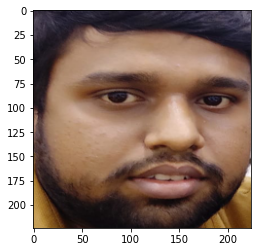

In [63]:
plt.imshow(faces_test_person[0][0])
plt.show()

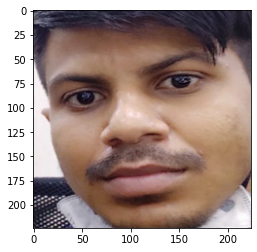

In [64]:
plt.imshow(faces_test_person[0][1])
plt.show()

working for multiple person image

#### common image test

In [164]:
imagePaths_common = list(paths.list_images('test_images_common'))

In [165]:
imagePaths_common

['test_images_common\\image5.jpg',
 'test_images_common\\image_0.jpg',
 'test_images_common\\image_10.jpg',
 'test_images_common\\image_20.jpg',
 'test_images_common\\image_30.jpg',
 'test_images_common\\image_40.jpg',
 'test_images_common\\image_60.jpg',
 'test_images_common\\image_70.jpg',
 'test_images_common\\image_80.jpg',
 'test_images_common\\image_90.jpg',
 'test_images_common\\photo_3.jpg',
 'test_images_common\\photo_3_blur.jpg',
 'test_images_common\\saved_img_0.jpg',
 'test_images_common\\saved_img_10.jpg',
 'test_images_common\\saved_img_15.jpg',
 'test_images_common\\saved_img_30.jpg',
 'test_images_common\\saved_img_35.jpg',
 'test_images_common\\saved_img_5.jpg',
 'test_images_common\\saved_img_65.jpg',
 'test_images_common\\saved_img_70.jpg',
 'test_images_common\\saved_img_80.jpg',
 'test_images_common\\saved_img_85.jpg',
 'test_images_common\\saved_img_90.jpg',
 'test_images_common\\_image_0.jpg',
 'test_images_common\\_image_30.jpg',
 'test_images_common\\_image_50.

#### analysis where faces not found

image_100.jpg- 3   - fail-object block the face
photo.jpg-     12  - fail
photo_2.jpg-   13   - fail
_image_90.jpg- -1  - fail
_image_80.jpg- -2  - pass
_image_100.jpg- -9 - pass

#### images where multiple face found

image_50.jpg   
_image_40.jpg  
_image_20.jpg  
_image_10.jpg  
saved_img_75.jpg 
saved_img_60.jpg  
saved_img_55.jpg  
saved_img_50.jpg  
saved_img_45.jpg
saved_img_40.jpg

test

In [169]:
faces_common= [extract_face_from_image(image_path)
         for image_path in imagePaths_common]

In [170]:
model_scores_common = get_model_scores(faces_common)

In [171]:
model_scores_common_temp=model_scores_common.numpy()

In [172]:
flag=0

In [174]:
for i in model_scores_common_temp:
    as1=model.predict(i.reshape(1,2048))
    print(imagePaths_common[flag]+" "+as1[0]) #predict_proba for probability
    flag+=1

test_images_common\image5.jpg archit
test_images_common\image_0.jpg divayanshu
test_images_common\image_10.jpg divayanshu
test_images_common\image_20.jpg divayanshu
test_images_common\image_30.jpg divayanshu
test_images_common\image_40.jpg divayanshu
test_images_common\image_60.jpg divayanshu
test_images_common\image_70.jpg divayanshu
test_images_common\image_80.jpg archit
test_images_common\image_90.jpg divayanshu
test_images_common\photo_3.jpg unknown
test_images_common\photo_3_blur.jpg divayanshu
test_images_common\saved_img_0.jpg archit
test_images_common\saved_img_10.jpg archit
test_images_common\saved_img_15.jpg archit
test_images_common\saved_img_30.jpg archit
test_images_common\saved_img_35.jpg unknown
test_images_common\saved_img_5.jpg archit
test_images_common\saved_img_65.jpg unknown
test_images_common\saved_img_70.jpg unknown
test_images_common\saved_img_80.jpg unknown
test_images_common\saved_img_85.jpg unknown
test_images_common\saved_img_90.jpg unknown
test_images_common

In [ ]:
fail
fail
fail
fail

#### multiple faces

In [176]:
imagePaths_multiple = list(paths.list_images('multiple'))

In [177]:
faces_multiple= [extract_face_from_image(image_path)
         for image_path in imagePaths_multiple]

In [181]:
np.shape(faces_multiple)

(11, 2, 224, 224, 3)

In [184]:
for i in faces_multiple:
    model_scores_multiple = get_model_scores(i)
    model_scores_multiple_temp=model_scores_multiple.numpy()
    for i in model_scores_multiple_temp:
        print(model.predict(i.reshape(1,2048)))

['divayanshu']
['unknown']
['archit']
['unknown']
['unknown']
['unknown']
['unknown']
['unknown']
['unknown']
['unknown']
['unknown']
['unknown']
['unknown']
['unknown']
['unknown']
['unknown']
['unknown']
['unknown']
['unknown']
['unknown']
['unknown']
['navneet']


In [185]:
imagePaths_multiple

['multiple\\image_50.jpg',
 'multiple\\saved_img_25.jpg',
 'multiple\\saved_img_40.jpg',
 'multiple\\saved_img_45.jpg',
 'multiple\\saved_img_50.jpg',
 'multiple\\saved_img_55.jpg',
 'multiple\\saved_img_60.jpg',
 'multiple\\saved_img_75.jpg',
 'multiple\\_image_10.jpg',
 'multiple\\_image_20.jpg',
 'multiple\\_image_40.jpg']

85% accuracy

total accuracy is 90%